# Oil Price Analysis

Import neccessary libraries and modules

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessor import DataPreprocessor  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 5)

**Data Collection**

- Download the brent oil price data

In [2]:
# Set google drive url for loading the dataset
url = 'https://drive.google.com/file/d/1dJfhjX57bjvFnc1HHYVUhyW939QjIQE5/view?usp=drive_link'

# Setup the data preprocessor class
processor = DataPreprocessor(url, logger=logger)
# Load the data
price_data = processor.load_data()

Downloading...
From: https://drive.google.com/uc?export=download&id=1dJfhjX57bjvFnc1HHYVUhyW939QjIQE5
To: /home/noh/10Academy/oil-price-statistical-modeling/data/data.csv
100%|██████████| 156k/156k [00:01<00:00, 129kB/s]
/home/noh/10Academy/oil-price-statistical-modeling/scripts/data_preprocessor.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'].str.strip(),  errors='coerce')


**Note**: always check `logs/notebooks.log` file for any log messages

In [3]:
# Explore the first 10 rows
price_data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [4]:
# Explore the last 10 rows
price_data.tail(10)

,Date,Price
9001,2022-11-01,95.12
9002,2022-11-02,96.07
9003,2022-11-03,95.29
9004,2022-11-04,99.53
9005,2022-11-07,99.87
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59


Create event dataset collected from various sources

In [5]:
# Define the events dictionary with categories
events_dict = {
    "Gulf War (1990-1991)": {"start": "1990-08-02", "end": "1991-02-28", "category": "Geopolitical Conflicts"},
    "September 11 Attacks (2001)": {"start": "2001-09-11", "end": "2001-09-11", "category": "Geopolitical Conflicts"},
    "2003 Invasion of Iraq": {"start": "2003-03-20", "end": "2011-12-18", "category": "Geopolitical Conflicts"},
    "2008 Financial Crisis": {"start": "2008-09-15", "end": "2009-07-01", "category": "Economic Crises"},
    "Arab Spring (2010-2012)": {"start": "2010-12-18", "end": "2012-12-18", "category": "Geopolitical Conflicts"},
    "Libyan Civil War (2011)": {"start": "2011-02-15", "end": "2011-10-23", "category": "Geopolitical Conflicts"},
    "U.S. Shale Oil Boom (2010s)": {"start": "2010-01-01", "end": "2019-12-31", "category": "Technological Advances"},
    "OPEC Production Cuts (2016-2017)": {"start": "2016-11-30", "end": "2017-06-30", "category": "OPEC Policies"},
    "Iran Nuclear Deal and Sanctions (2015-2018)": {"start": "2015-07-14", "end": "2018-05-07", "category": "OPEC Policies"},
    "COVID-19 Pandemic (2020)": {"start": "2020-03-11", "end": "2022-09-30", "category": "Economic Crises"},
    "OPEC+ Response to COVID-19 (2020)": {"start": "2020-04-09", "end": "2020-12-31", "category": "OPEC Policies"},
    "Russia-Ukraine Conflict (2022)": {"start": "2022-02-24", "end": "2022-09-30", "category": "Geopolitical Conflicts"},
    "Global Economic Recovery (2021-2022)": {"start": "2021-01-01", "end": "2022-09-30", "category": "Economic Crises"}
}

# Convert the events dictionary to a DataFrame
events_data = pd.DataFrame.from_dict(events_dict, orient='index')
events_data.reset_index(inplace=True)
events_data.columns = ['Event', 'Start', 'End', 'Category']

# Convert Start and End to datetime
events_data['Start'] = pd.to_datetime(events_data['Start'])
events_data['End'] = pd.to_datetime(events_data['End'])


In [6]:
events_data

,Event,Start,End,Category
0,Gulf War (1990-1991),1990-08-02,1991-02-28,Geopolitical Conflicts
1,September 11 Attacks (2001),2001-09-11,2001-09-11,Geopolitical Conflicts
2,2003 Invasion of Iraq,2003-03-20,2011-12-18,Geopolitical Conflicts
3,2008 Financial Crisis,2008-09-15,2009-07-01,Economic Crises
4,Arab Spring (2010-2012),2010-12-18,2012-12-18,Geopolitical Conflicts
5,Libyan Civil War (2011),2011-02-15,2011-10-23,Geopolitical Conflicts
6,U.S. Shale Oil Boom (2010s),2010-01-01,2019-12-31,Technological Advances
7,OPEC Production Cuts (2016-2017),2016-11-30,2017-06-30,OPEC Policies
8,Iran Nuclear Deal and Sanctions (2015-2018),2015-07-14,2018-05-07,OPEC Policies
9,COVID-19 Pandemic (2020),2020-03-11,2022-09-30,Economic Crises


Combine the price data with event data

In [7]:
def merge_event(events_data: pd.DataFrame, price_data: pd.DataFrame) -> pd.DataFrame:
    # Ensure Date, Start, and End columns are in datetime format
    price_data['Date'] = pd.to_datetime(price_data['Date'])
    events_data['Start'] = pd.to_datetime(events_data['Start'])
    events_data['End'] = pd.to_datetime(events_data['End'])

    # Create a DataFrame that contains each price date with corresponding events
    events_expanded = pd.DataFrame({
        'Date': pd.date_range(start=events_data['Start'].min(), end=events_data['End'].max(), freq='D')
    })

    # Merge expanded dates with the events data to bring over both Event and Category
    merged_data = pd.merge_asof(
        events_expanded.sort_values('Date'), 
        events_data.sort_values('Start'), 
        left_on='Date', 
        right_on='Start', 
        direction='backward'
    )

    # Merge the price data with the merged event data
    price_data = price_data.merge(merged_data[['Date', 'Event', 'Category']], on='Date', how='left')

    # Fill 'Event' and 'Category' columns with 'No Event' where there is no match
    price_data.fillna({'Event': 'No Event', 'Category': 'No Category'}, inplace=True)

    return price_data

# Apply the function to merge events with each price date
price_data = merge_event(events_data, price_data)


In [8]:

# Now price_data contains the original price data along with the corresponding events
price_data.head(10)  # View the combined data


,Date,Price,Event,Category
0,1987-05-20,18.63,No Event,No Category
1,1987-05-21,18.45,No Event,No Category
2,1987-05-22,18.55,No Event,No Category
3,1987-05-25,18.60,No Event,No Category
4,1987-05-26,18.63,No Event,No Category
5,1987-05-27,18.60,No Event,No Category
6,1987-05-28,18.60,No Event,No Category
7,1987-05-29,18.58,No Event,No Category
8,1987-06-01,18.65,No Event,No Category
9,1987-06-02,18.68,No Event,No Category


In [9]:
price_data.iloc[8011:8021]

,Date,Price,Event,Category
8011,2018-12-07,61.71,OPEC Production Cuts (2016-2017),OPEC Policies
8012,2018-12-10,60.29,OPEC Production Cuts (2016-2017),OPEC Policies
8013,2018-12-11,59.73,OPEC Production Cuts (2016-2017),OPEC Policies
8014,2018-12-12,59.94,OPEC Production Cuts (2016-2017),OPEC Policies
8015,2018-12-13,59.03,OPEC Production Cuts (2016-2017),OPEC Policies
8016,2018-12-14,58.56,OPEC Production Cuts (2016-2017),OPEC Policies
8017,2018-12-17,57.59,OPEC Production Cuts (2016-2017),OPEC Policies
8018,2018-12-18,55.26,OPEC Production Cuts (2016-2017),OPEC Policies
8019,2018-12-19,55.60,OPEC Production Cuts (2016-2017),OPEC Policies
8020,2018-12-20,52.84,OPEC Production Cuts (2016-2017),OPEC Policies


### Data Cleaning and Preprocessing

Inspect the dataset for completeness and structure

In [10]:
processor.inspect(price_data)

Dimensions (rows, columns): (9011, 4)

Data Types:
Date        datetime64[ns]
Price              float64
Event               object
Category            object
dtype: object

No missing values found.

Unique Values in Each Column:
Date        9011
Price       5015
Event         14
Category       5
dtype: int64
Number of duplicate rows: 0

Summary Statistics for Numeric Columns:


,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


**Detect Outliers**

- Box plot

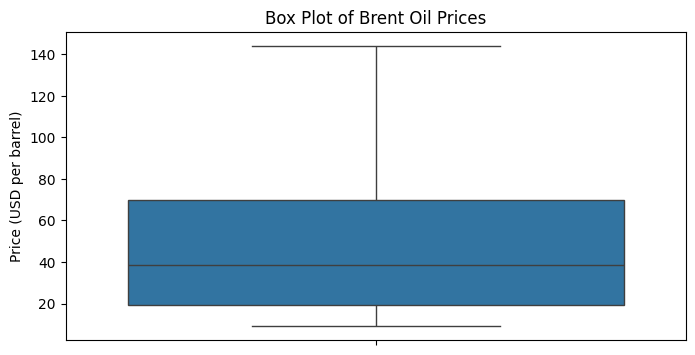

In [11]:
# Assuming 'price_data' is your DataFrame containing the 'Price' column
plt.figure(figsize=(8, 4))
sns.boxplot(data=price_data, y='Price')
plt.title('Box Plot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()

- No outliers detected in the price data

### Exploratory Data Analysis

- Descriptive Statistics

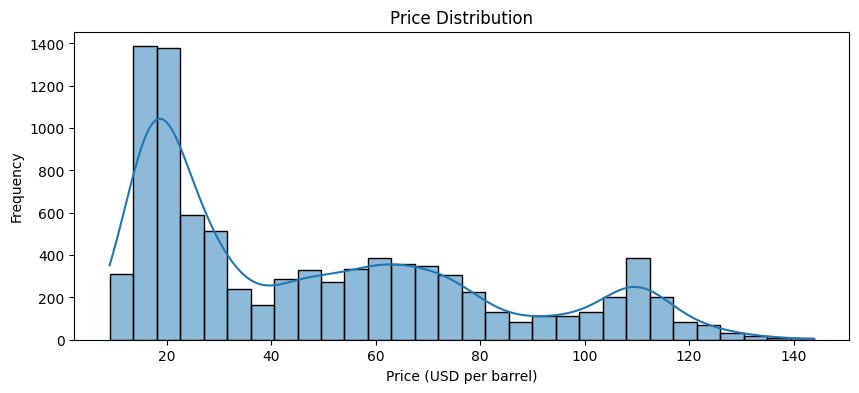

In [12]:
# Visualize the price distribution
plt.figure(figsize=(10, 4))
sns.histplot(price_data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD per barrel)')
plt.ylabel('Frequency')
plt.show()


- Event Distribution

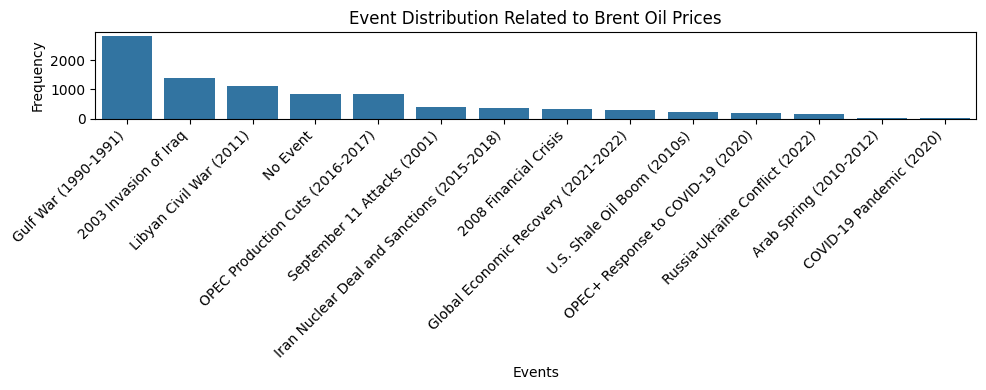

In [13]:
# Assuming 'Event' is the column containing the names of the events in price_data
event_counts = price_data['Event'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Event Distribution Related to Brent Oil Prices')
plt.xlabel('Events')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

**Time Series Analysis**
- Overall price trend

    - Create a line graph to visualize price trends over time.

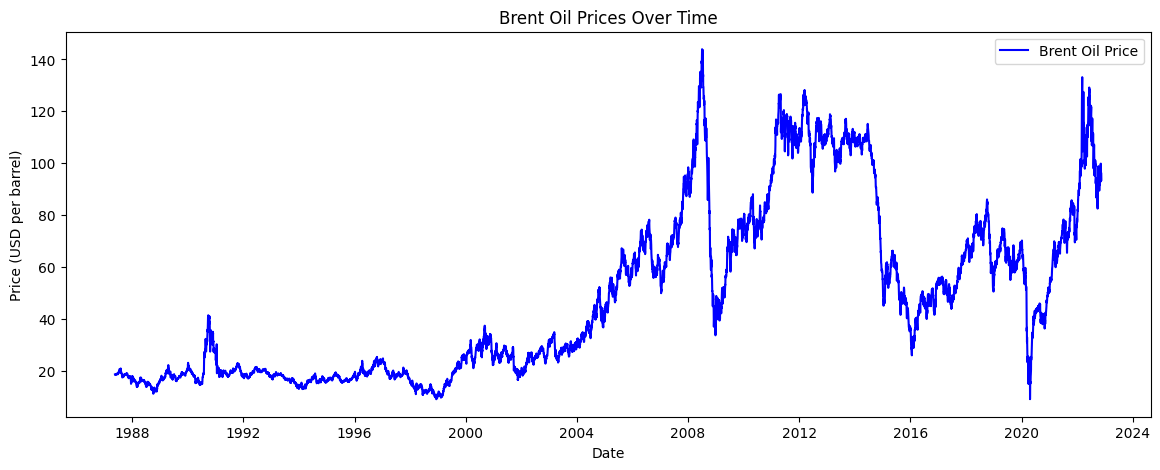

In [14]:
plt.plot(price_data['Date'], price_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
# plt.axvline(x='Date', color='red', linestyle='--', label='Event Marker')
plt.legend()
plt.show()


- **Seasonality Analysis**
    - Aggregate prices by year and visualize seasonal patterns.

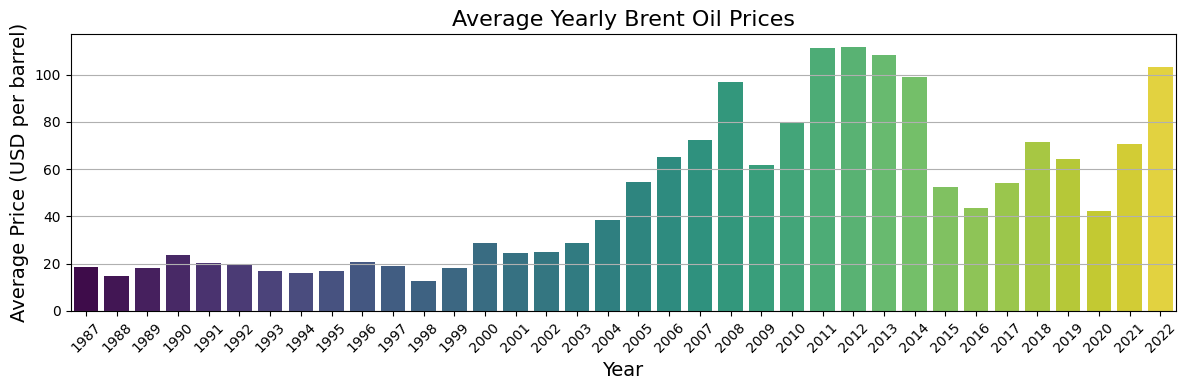

In [15]:
# Extract the year from the Date
price_data['Year'] = price_data['Date'].dt.year

# Calculate average price per year
yearly_avg = price_data.groupby('Year')['Price'].mean().reset_index()

# Plot yearly average prices
plt.figure(figsize=(12, 4))
sns.barplot(x='Year', y='Price', data=yearly_avg, hue='Year', legend=False, palette='viridis')
plt.title('Average Yearly Brent Oil Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (USD per barrel)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

CUSUM Analysis

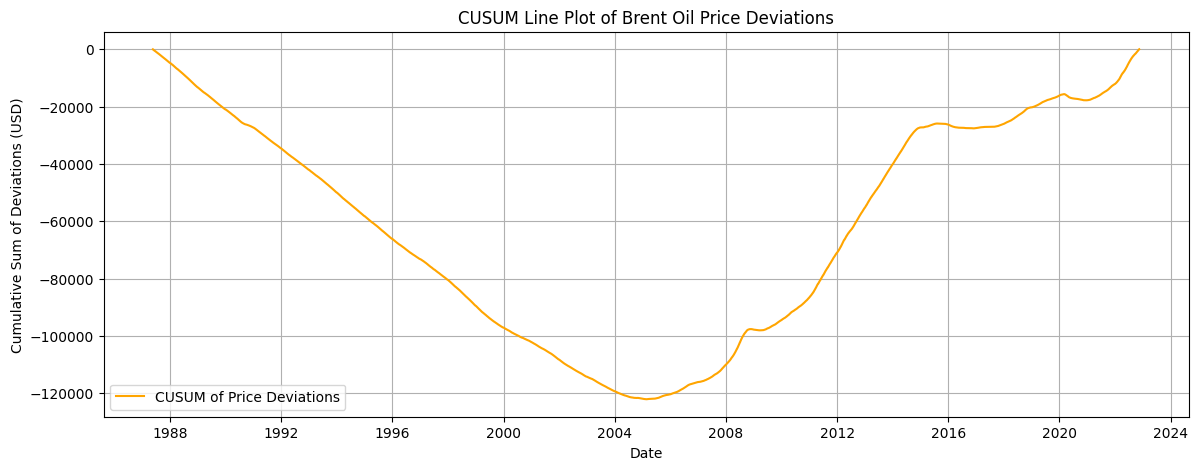

In [16]:
# Calculate CUSUM (Cumulative Sum of Deviations from Mean)
mean_price = price_data['Price'].mean()
cusum = (price_data['Price'] - mean_price).cumsum()

# Plotting the CUSUM line plot
plt.figure(figsize=(14, 5))
plt.plot(price_data['Date'], cusum, label='CUSUM of Price Deviations', color='orange')

# Enhancements for better readability
plt.title('CUSUM Line Plot of Brent Oil Price Deviations')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum of Deviations (USD)')
plt.legend()
plt.grid()
plt.show()

**Event-Specific Price Impact Analysis**

Change Point Analysis with CUMSUM

Detected change point years: [1999, 2005, 2010, 2014, 2021]


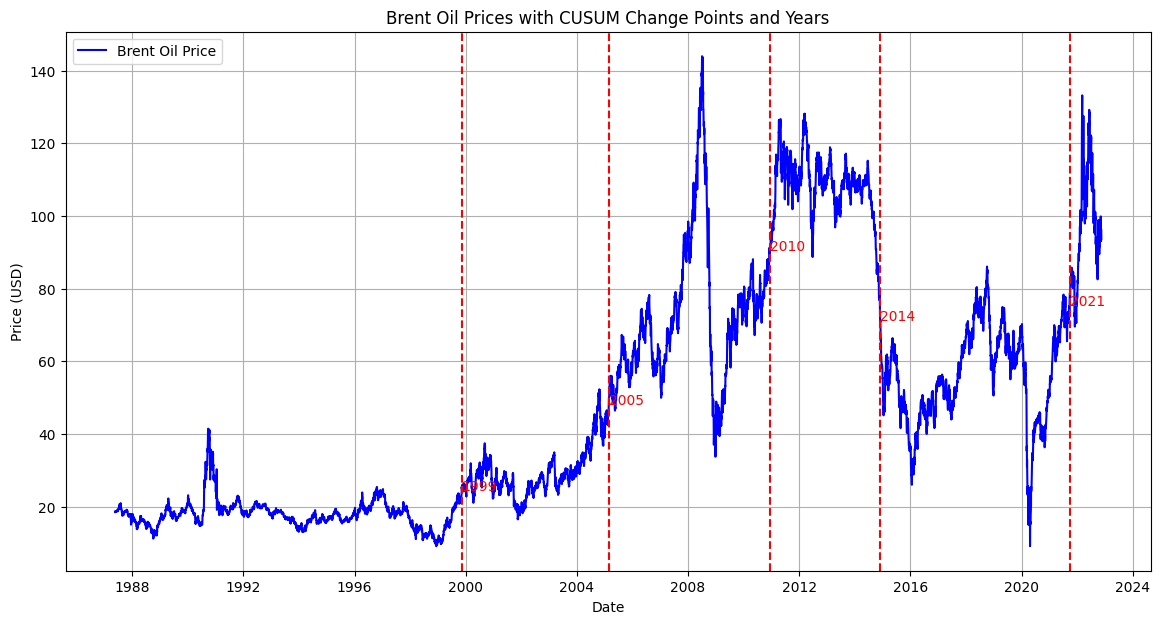

In [17]:
import ruptures as rpt

# Extract the price series for change point detection
price_series = price_data['Price'].values

# Apply the CUSUM-based method for change point detection
algo = rpt.Binseg(model="l2").fit(price_series)
change_points = algo.predict(n_bkps=5)  # Adjust n_bkps for more or fewer breakpoints

# Extract and print the year of each change point
change_years = [price_data['Date'].iloc[cp].year for cp in change_points[:-1]]  # Exclude the last index (end of data)
print("Detected change point years:", change_years)

# Plotting the Brent Oil Price with change points
plt.figure(figsize=(14, 7))
plt.plot(price_data['Date'], price_data['Price'], label='Brent Oil Price', color='blue')

# Overlay detected change points with year annotations
for cp in change_points[:-1]:  # Exclude the last point (end of data)
    year = price_data['Date'].iloc[cp].year
    plt.axvline(price_data['Date'].iloc[cp], color='red', linestyle='--')
    plt.text(price_data['Date'].iloc[cp], price_data['Price'].iloc[cp], str(year), color="red", fontsize=10)

# Enhancements
plt.title('Brent Oil Prices with CUSUM Change Points and Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

Baysian Change Point Detection

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mean_prior]
>Metropolis: [change_point]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


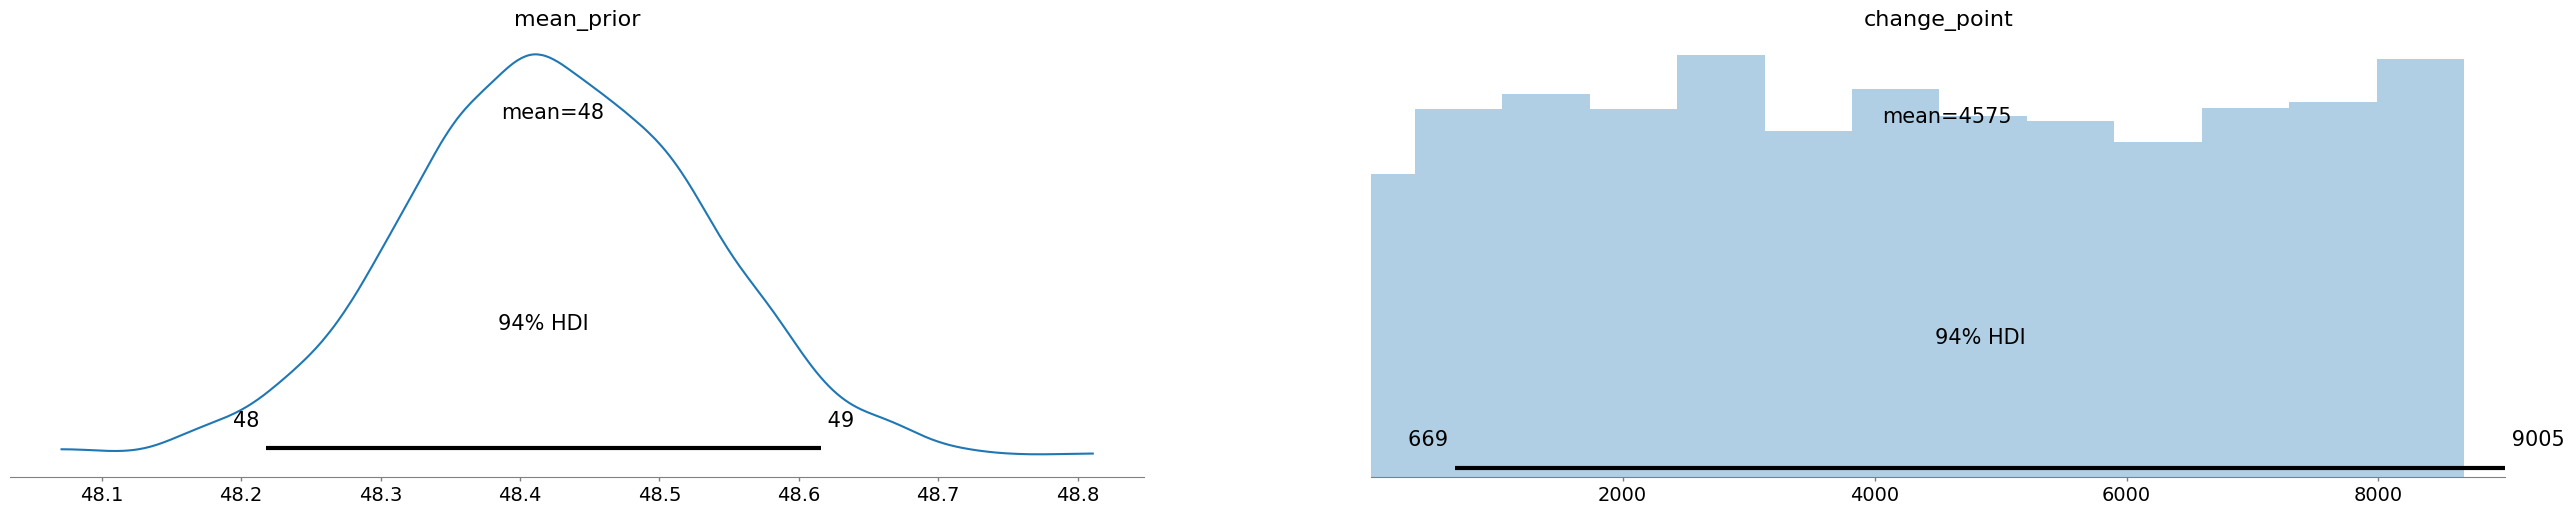

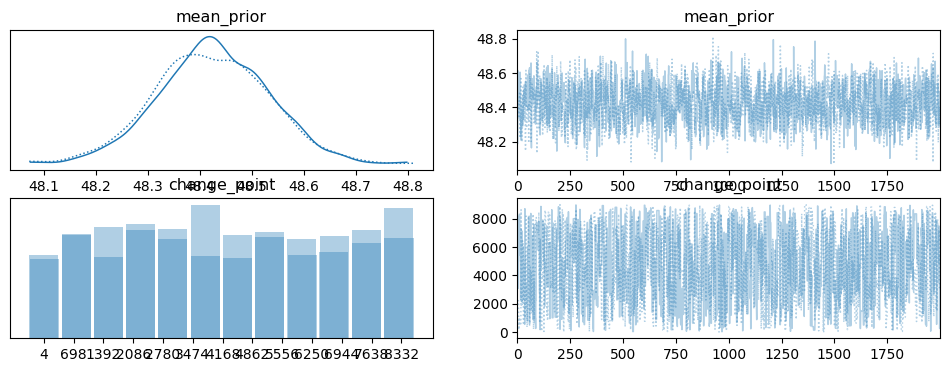

Estimated Change Point Date: 2005-01-26 00:00:00
95% HDI for the Change Point: [[ 827. 2847.]
 [2214. 7461.]
 [2214. 7461.]
 ...
 [ 249. 3069.]
 [ 249. 3069.]
 [ 249. 3069.]]


/tmp/ipykernel_58341/2639500766.py:41: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(s_posterior, hdi_prob=0.95)  # Calculate the HDI at 95% probability


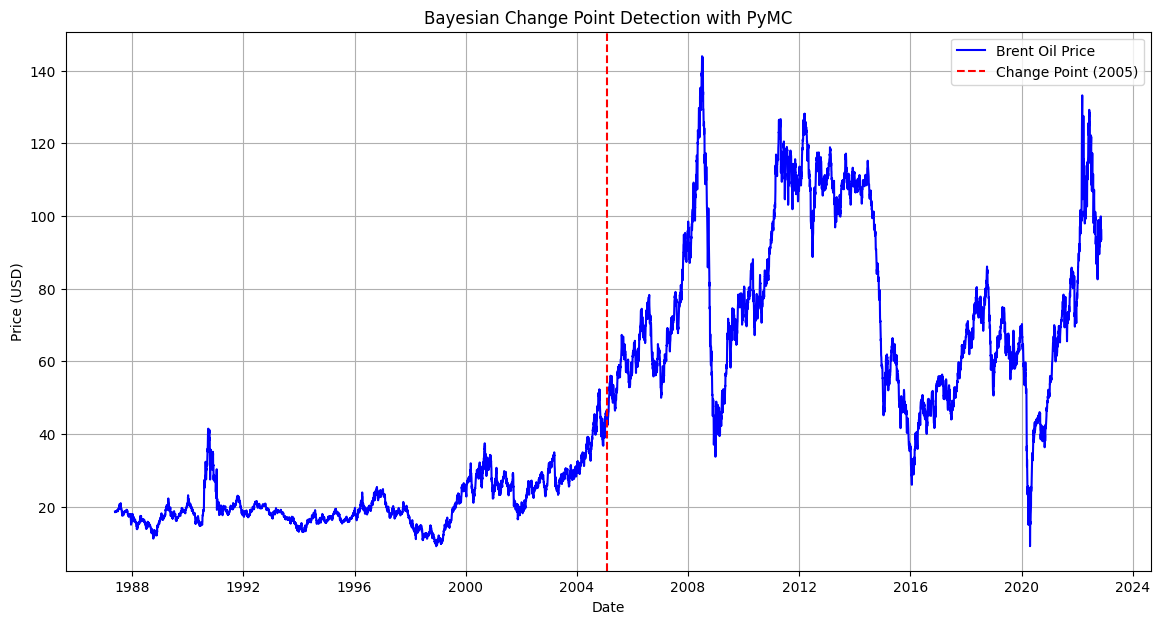

In [27]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

# Assuming price_data is a pandas DataFrame with a 'Price' column
data = price_data['Price'].values

# Set informative mean priors based on your analysis
prior_mu1 = np.mean(data)  # Prior mean for the first segment

with pm.Model() as model:
    # Mean and standard deviation for each segment with informative priors
    mean_prior = pm.Normal('mean_prior', mu=prior_mu1, sigma=10)
    # Change point location (a discrete uniform distribution)
    change_point = pm.DiscreteUniform('change_point', lower=1, upper=len(data) - 1)

    # Likelihood
    likelihood = pm.Normal('likelihood', 
                           mu=mean_prior, 
                           sigma=10,observed=data)

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000)

# Analyze and plot the results
pm.plot_posterior(trace)

plt.show()

# Extract the change point
s_posterior = trace.posterior['change_point'].values
estimated_change_point = int(np.median(s_posterior))

# Convert the index of the change point back to date (if necessary)
change_point_date = price_data.index[estimated_change_point]
print(f"Estimated Change Point Date: {change_point_date}")

# Calculate HDI for the change point
hdi = az.hdi(s_posterior, hdi_prob=0.95)  # Calculate the HDI at 95% probability
print(f"95% HDI for the Change Point: {hdi}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(price_data.index, data, label='Brent Oil Price', color='blue')
plt.axvline(change_point_date, color='red', linestyle='--', label=f'Change Point ({change_point_date.year})')
plt.title('Bayesian Change Point Detection with PyMC')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


- **Impact of Event Categories on Oil Price**

    - Line Plot impact of event category on oil price

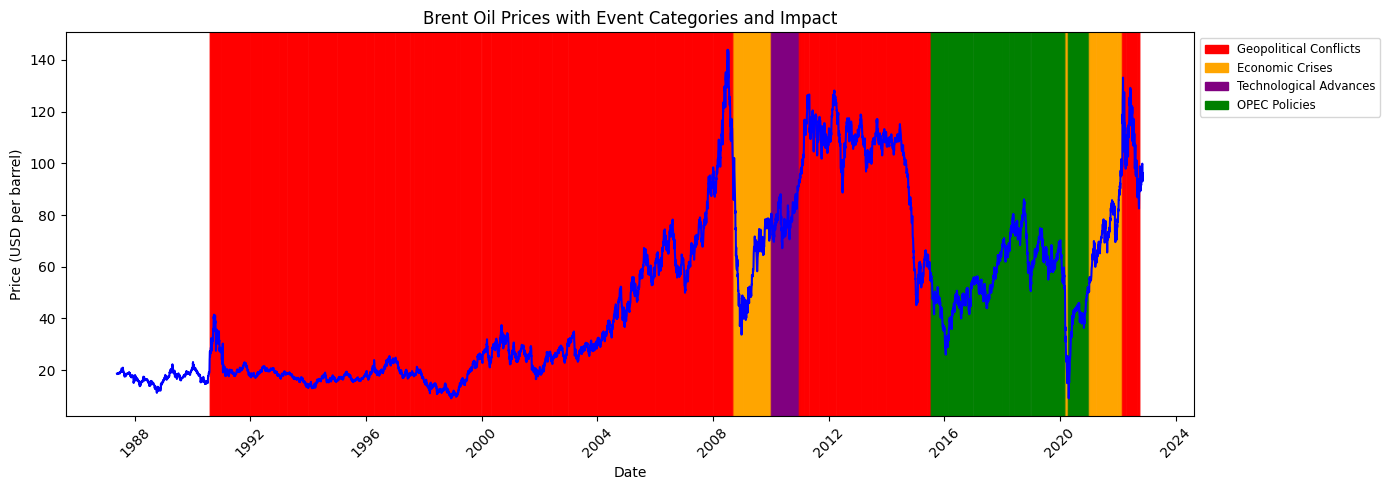

In [ ]:
def plot_oil_price_with_category_events(price_data):
    
    # Plot the oil price data
    sns.lineplot(data=price_data, x='Date', y='Price', label='Brent Oil Price', color='blue')

    # Define colors for each category
    category_colors = {
        "Geopolitical Conflicts": "red",
        "Economic Crises": "orange",
        "OPEC Policies": "green",
        "Technological Advances": "purple"
    }
    
    # Dictionary to store legend handles for each category
    legend_patches = []

    # Track which categories have been added to the legend to avoid duplicates
    added_categories = set()
    
    # Add shaded regions for events based on category
    for _, event_row in price_data.iterrows():
        if event_row['Event'] != 'No Event':
            category = event_row['Category']
            color = category_colors[category]
            
            # Shade the event duration
            plt.axvspan(event_row['Date'], event_row['Date'], color=color, alpha=0.3)
            
            # Add to legend only if this category hasn't been added yet
            if category not in added_categories:
                legend_patches.append(mpatches.Patch(color=color, label=category))
                added_categories.add(category)

    # Label and style the plot
    plt.title('Brent Oil Prices with Event Categories and Impact')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per barrel)')
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_oil_price_with_category_events(price_data)


- **Statistical Analysis of Price Changes (Before, During, and After Events)**

    - perform statistical analysis to quantify the impact of events. For instance, calculate the average price before, during, and after the event:

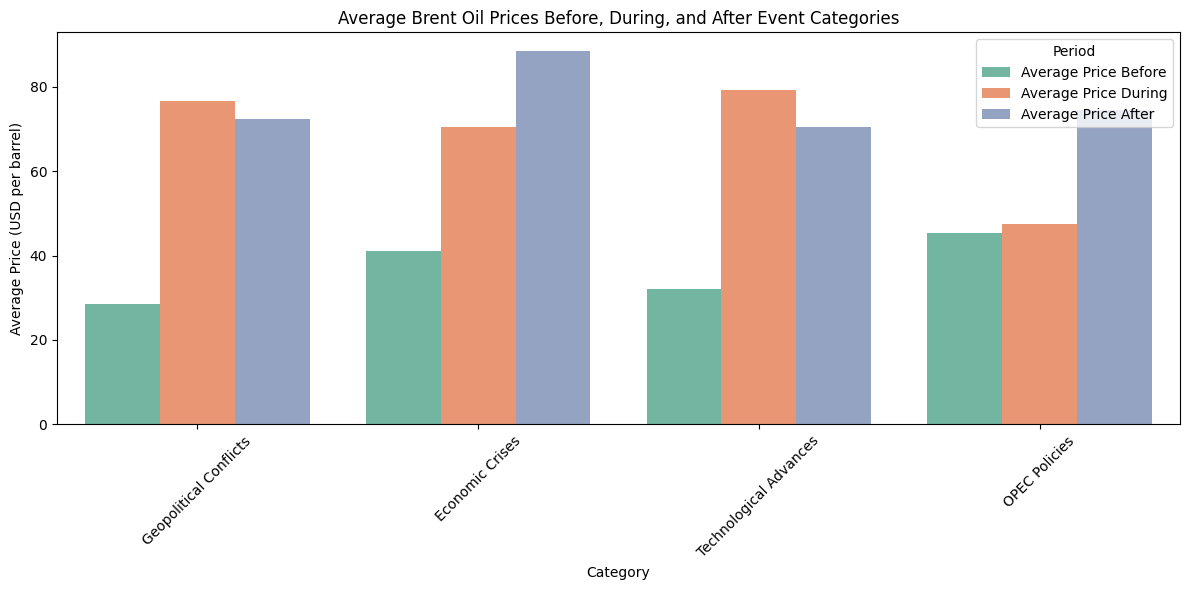

In [ ]:
def calculate_avg_prices_by_event(price_data, events_data):
    # List to store average prices for each category
    avg_prices = []

    # Loop through each category and calculate average price before, during, and after
    for category in events_data['Category'].unique():
        # Filter events by category
        category_events = events_data[events_data['Category'] == category]
        
        # Lists to store prices for each period within the category
        before_prices, during_prices, after_prices = [], [], []
        
        for _, event in category_events.iterrows():
            event_start, event_end = event['Start'], event['End']
            
            # Data before, during, and after the event
            before_event = price_data[price_data['Date'] < event_start]['Price']
            during_event = price_data[(price_data['Date'] >= event_start) & (price_data['Date'] <= event_end)]['Price']
            after_event = price_data[price_data['Date'] > event_end]['Price']
            
            # Get the average price in each period if data is available
            if not before_event.empty:
                before_prices.append(before_event.mean())
            if not during_event.empty:
                during_prices.append(during_event.mean())
            if not after_event.empty:
                after_prices.append(after_event.mean())
        
        # Calculate overall average prices for each period in the category
        avg_before = sum(before_prices) / len(before_prices) if before_prices else None
        avg_during = sum(during_prices) / len(during_prices) if during_prices else None
        avg_after = sum(after_prices) / len(after_prices) if after_prices else None
        
        avg_prices.append({
            'Category': category,
            'Average Price Before': avg_before,
            'Average Price During': avg_during,
            'Average Price After': avg_after
        })

    # Convert to DataFrame for visualization
    avg_prices_df = pd.DataFrame(avg_prices).melt(id_vars='Category', var_name='Period', value_name='Average Price')
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Average Price', hue='Period', data=avg_prices_df, palette='Set2')
    plt.title('Average Brent Oil Prices Before, During, and After Event Categories')
    plt.ylabel('Average Price (USD per barrel)')
    plt.xticks(rotation=45)
    plt.legend(title='Period')
    plt.tight_layout()
    plt.show()

# Call the function
calculate_avg_prices_by_event(price_data, events_data)


- **Scatter Plot of Price Fluctuations with Specific Events**

    - Generate scatter plots to observe price fluctuations associated with specific events.

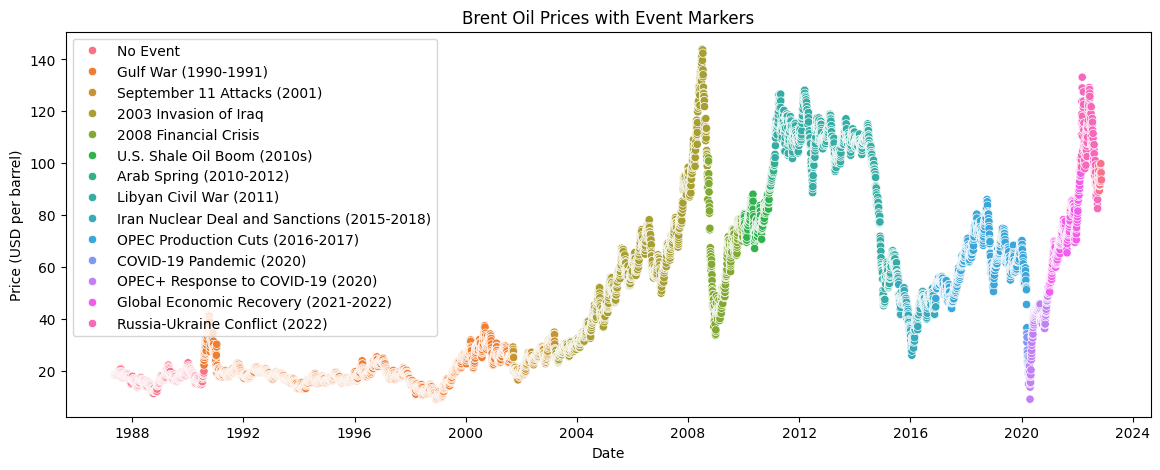

In [ ]:
sns.scatterplot(x='Date', y='Price', hue='Event', data=price_data)
plt.title('Brent Oil Prices with Event Markers')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


**Advanced Event Analysis**

- **Rolling Volatility Analysis**
    - Rolling standard deviation (e.g., 30-day) line plot of prices.

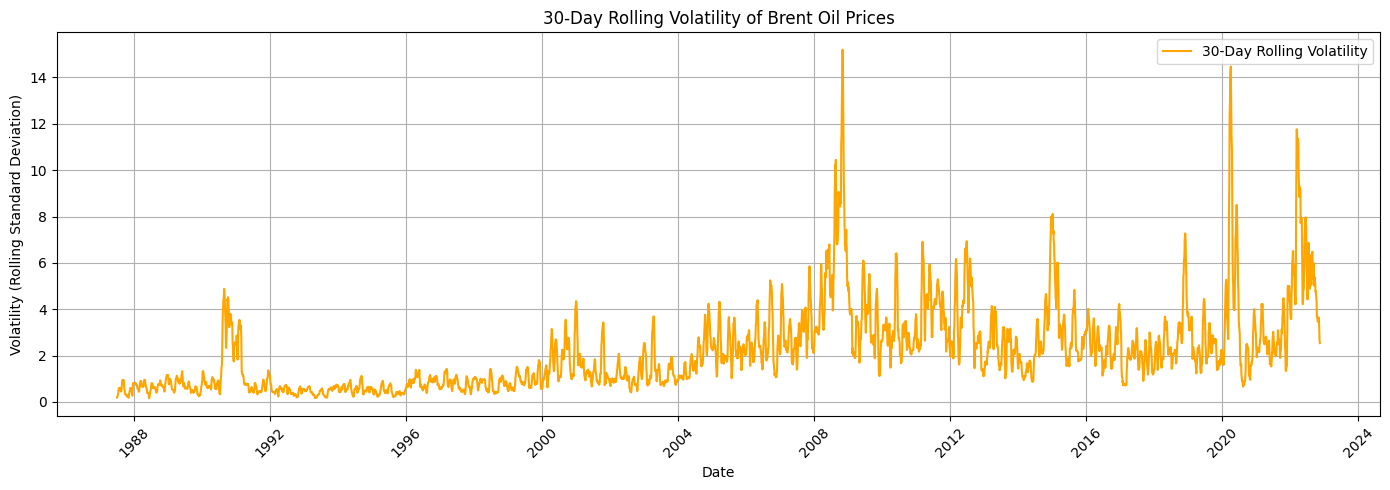

In [ ]:
def plot_rolling_volatility(price_data, window=30):
    """
    Plot the rolling standard deviation (volatility) of oil prices over a specified window.
    
    Parameters:
    - price_data (pd.DataFrame): DataFrame with 'Date' and 'Price' columns.
    - window (int): The rolling window size in days (default is 30).
    """
    # Calculate rolling standard deviation (volatility)
    price_data['Rolling_Volatility'] = price_data['Price'].rolling(window=window).std()
    
    # Plot
    plt.plot(price_data['Date'], price_data['Rolling_Volatility'], label=f'{window}-Day Rolling Volatility', color='orange')
    
    # Label and style the plot
    plt.title(f'{window}-Day Rolling Volatility of Brent Oil Prices')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Rolling Standard Deviation)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_rolling_volatility(price_data)

- **Cumulative Price Impact During Events**
    - Line plot showing cumulative price changes within each event’s duration.

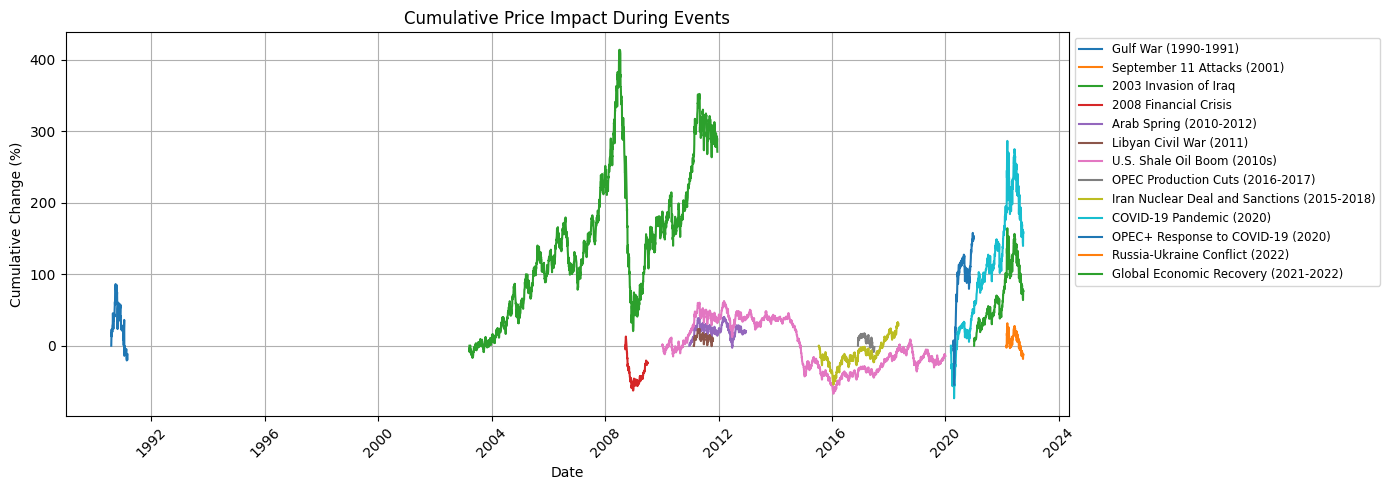

In [ ]:
def plot_cumulative_price_impact(price_data, events_data):
    """
    Plot cumulative price changes within each event's duration.
    
    Parameters:
    - price_data (pd.DataFrame): DataFrame with 'Date' and 'Price' columns.
    - events_data (pd.DataFrame): DataFrame with 'Event', 'Start', and 'End' columns.
    """
    
    # Loop over each event to calculate cumulative price changes
    for _, event in events_data.iterrows():
        # Filter price data within the event's start and end dates
        event_prices = price_data[(price_data['Date'] >= event['Start']) & (price_data['Date'] <= event['End'])].copy()
        
        if not event_prices.empty:
            # Calculate cumulative percentage change
            event_prices['Cumulative Change'] = (event_prices['Price'] / event_prices['Price'].iloc[0] - 1) * 100
            
            # Plot cumulative change for this event
            plt.plot(event_prices['Date'], event_prices['Cumulative Change'], label=f"{event['Event']}")
    
    # Label and style the plot
    plt.title("Cumulative Price Impact During Events")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Change (%)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_cumulative_price_impact(price_data, events_data)

- **Event Impact on Price Returns**
    - Line plot or bar chart of average daily/monthly returns around events.

In [ ]:
def calculate_daily_returns(price_data):
    """
    Calculate daily returns based on price data.
    
    Parameters:
    - price_data (pd.DataFrame): DataFrame with 'Date' and 'Price' columns.
    
    Returns:
    - pd.DataFrame: DataFrame with 'Date' and 'Daily Return' columns.
    """
    price_data['Daily Return'] = price_data['Price'].pct_change()
    return price_data


In [ ]:
def average_returns_around_events(price_data, events_data, window_days=5):
    """
    Calculate average daily returns around each event.
    
    Parameters:
    - price_data (pd.DataFrame): DataFrame with daily price and returns.
    - events_data (pd.DataFrame): DataFrame with event details including 'Start' and 'End'.
    - window_days (int): Number of days to include before and after the event.
    
    Returns:
    - pd.DataFrame: DataFrame with average returns around events.
    """
    # Create a DataFrame to hold average returns
    avg_returns = []

    for _, event in events_data.iterrows():
        # Define the window for the event
        start_date = event['Start'] - pd.Timedelta(days=window_days)
        end_date = event['End'] + pd.Timedelta(days=window_days)

        # Filter price data within the defined window
        window_data = price_data[(price_data['Date'] >= start_date) & (price_data['Date'] <= end_date)]

        # Calculate average returns for the window
        avg_return = window_data['Daily Return'].mean()
        avg_returns.append({
            'Event': event['Event'],
            'Average Return': avg_return
        })

    return pd.DataFrame(avg_returns)

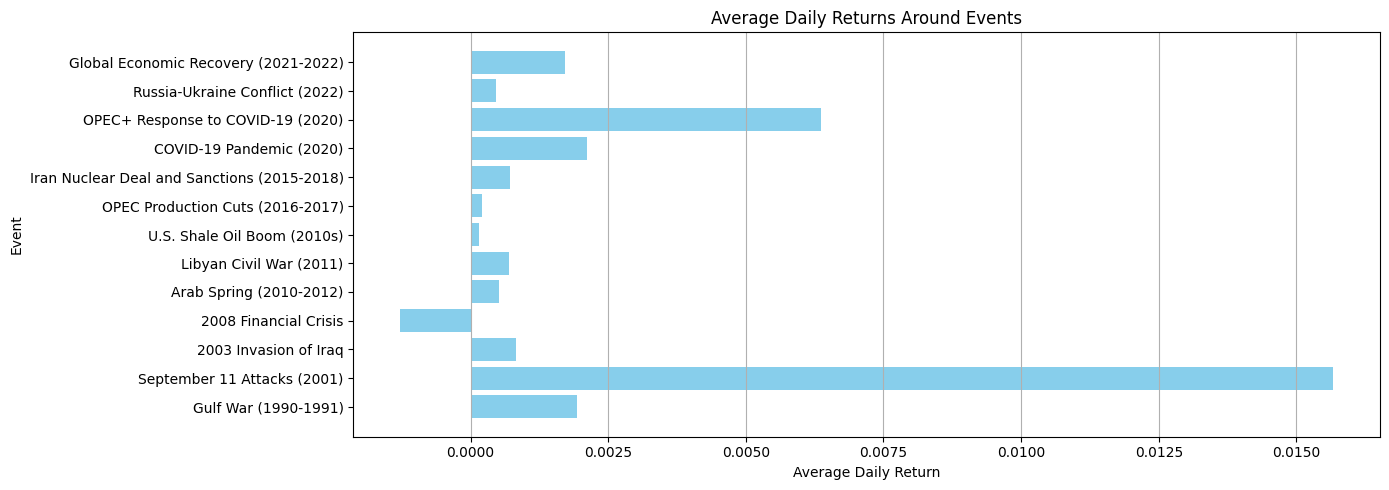

In [ ]:
def plot_average_returns(average_returns):
    """
    Plot average returns around events.
    
    Parameters:
    - average_returns (pd.DataFrame): DataFrame with 'Event' and 'Average Return'.
    """
    plt.barh(average_returns['Event'], average_returns['Average Return'], color='skyblue')
    plt.title('Average Daily Returns Around Events')
    plt.xlabel('Average Daily Return')
    plt.ylabel('Event')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Call functions
price_data = calculate_daily_returns(price_data)
average_returns = average_returns_around_events(price_data, events_data, window_days=5)
plot_average_returns(average_returns)